In [1]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# ONDA D'URTO DI SEDOV-TAYLOR-VON NEUMANN

Questo Notebook propone uno studio analitico di un'onda d'urto generata da un'esplosione supersonica. Intuitivamente un fenomeno esplosivo si ha ogni qualvolta una quantità di energia $\Delta E$ viene rilasciata in un tempo molto breve $\Delta t$, ossia se $\Delta E/\Delta t$ (potenza) è sufficientemente grande. Viene dunque generato un fronte di compressione delle grandezze caratteristiche del fluido (densità, pressione e conseguentemente velocità del suono); all'interno di un fluido idealmente infinito la propagazione del fronte d'onda è ragionevolmente sferica, in accordo al fatto che nessuna direzione è effettivamente privilegiata (diverso il caso in cui il fluido sia sottoposto ad un potenziale esterno come quello gravitazionale, che cambierebbe la forma del $\textit{shock front}$). 

L'equazione che descrive l'andamento del raggio del fronte d'onda nel tempo si ottiene tramite argomenti dimensionali. Il raggio a un generico istante $t$ di tempo dipenderà da:

- Energia $E$;
- Pressione pre-shock $p_1$;
- Densità pre-shock $\rho_1$ (legata alla pressione tramite l'equazione di stato del fluido);
- parametro $\gamma$ tipico del gas e legato alla sua natura molecolare.

Seguendo tale filo logico si giunge alla seguente equazione per la dipendenza temporale del raggio del fronte d'onda nel tempo:

\begin{equation*}
    R_S = k_{\gamma} \left(\frac{E t^2}{\rho_1}\right)^{\frac{1}{5}}
\end{equation*}

Derivando nel tempo si ottiene facilmente la velocità balistica di espansione dell'onda d'urto.

\begin{equation*}
    v_S = \frac{2}{5} k_{\gamma} \left(\frac{E}{\rho_1 t^3}\right) = \frac{2}{5} \frac{R_S}{t}
\end{equation*}

## Grandezze caratteristiche del fluido per numeri di Mach grandi

Dallo studio delle superfici di discontinuità dei fluidi si è pervenuti alla classificazione dei diversi tipi di shock in funzione del numero di Mach $M$. Il caso di onde d'urto rientra nel caso $M >> 1$ (esplosione ipersonica). L'idea dietro lo studio di Sedov, Taylor e Von Neumann consiste nello studiare l'onda d'urto a un certo istante fissato, analizzando come variano le quantità fluidodinamiche notevoli (pressione, velocità del suono, densità e temperatura) al variare della posizione all'interno della sfera di fuoco. Defininendo allora la quantità adimensionale $\xi$:

$$\xi = \frac{r}{R_s(t)}$$

si hanno i seguenti andamenti di densità, velocità e pressione:

\begin{equation*}
    \begin{cases}
        \rho_2 = \rho_1 \frac{\gamma + 1}{\gamma - 1} R(\xi) \\

        v_2 = v_s \frac{2}{\gamma - 1} V(\xi)\\
        
        p_2 = \rho_1 v_S^2 \frac{2}{\gamma - 1} P(\xi) \\
    \end{cases}
\end{equation*}

dove sono state definite delle quantità adimensionali come:
- $R(\xi)$ -> densità adimensionalizzata;
- $V(\xi)$ -> velocità del suono adimensionalizzata;
- $P(\xi)$ -> pressione adimensionalizzata.

Dal sistema di equazioni che mette in relazione l'andamento delle quantità fluidodinamiche nella regione post-urto (2) con quelle della regione pre-urto(1), si ricavano le condizioni al bordo per le quantità adimensionali appena definite:

\begin{equation*}
    \begin{cases}
        R(1) = 1\\

        V(1) = 1\\
        
        P(1) = 1\\
    \end{cases}
\end{equation*}

Sfruttando le equazioni costitutive della fluidodinamica (Navier-Stokes) e le quantità appena definite, si ricava il seguente sistema di equazioni differenziali lineari del primo ordine:

\begin{equation*}
    \begin{cases}
        \left(\frac{2V}{\gamma + 1} -\xi \right) R' + \frac{2R}{\gamma + 1}V' = - \frac{4}{\gamma + 1} \frac{RV}{\xi} \\

        -2 \xi V' - 3 V  \frac{4 V' V}{\gamma + 1} + \frac{\gamma - 1}{\gamma + 1} \frac{2 P'}{R} = 0\\

        \left(\frac{2}{\gamma + 1} V - x\right)\frac{P'}{P} + \gamma \left(\xi - \frac{2}{\gamma + 1} V \right) \frac{R'}{R} = 3\\
    \end{cases}
\end{equation*}

Al fine di ottenere il sistema in forma normale si sfrutta il metodo di Cramer per trovare un'espressione analitica per l'integrazione della pressione; dopodichè si procede per sostituzioni successive. Il sistema in forma normale risulta essere:

\begin{equation*}
    \begin{cases}
        P' = \frac{P}{2} \frac{3 \xi (\gamma + 1) - V \left(6 + \gamma - \frac{8 \gamma V}{\xi (\gamma + 1)}\right)}{2 \left(\xi \frac{\gamma + 1}{2} - V\right)(\frac{2 V}{\gamma + 1} - \xi) + \gamma \frac{P}{R}\frac{\gamma - 1}{\gamma + 1}}\\

        R' = \frac{R}{\gamma} \left(\frac{P'}{P} + \frac{3}{\xi - \frac{2 V}{\gamma + 1}}\right) \\

        V' = \frac{R'}{R} \left(\frac{\gamma + 1}{2} \xi - V\right) - \frac{2 V}{\xi}
    \end{cases}
\end{equation*}

Per ricavare l'andamento della temperatura non è necessario integrare ulteriori equazioni differenziali; è infatti possibile sfruttare l'equazione di stato dei gas perfetti per ricavare la relazione tra temperatura nella regione pre-shock ($T_1$) e nella regione post-shock ($T_2$). Definendo la grandezza adimensionalizzata $T (\xi) = T_2/T_1$ si ha:

\begin{equation*}
    T(\xi) \approx \frac{R(\xi)}{P(\xi)}
\end{equation*}

## Integrazione tramite c

Le equazioni differenziali relative all'evoluzione delle tre grandezze adimensionali $R(\xi)$, $V(\xi)$ e $P(\xi)$ sono integrate tramite Runge-Kutta 4. L'integrazione è implementata con un programma modulare in C usando un passo di integrazione negativo $d \xi = -10^{-6}$. Inizialmente era stata valutata l'opzione di implementare un'integrazione a passo d'integrazione variabile, scegliendo il $d \xi$ del passo n-esimo tramite il seguente algoritmo:

$$d \xi_{n+1} = min\left(d \xi_n, \frac{|P_{n+1} - P_n|}{P'(P_n, R_n, V_n)}, \frac{|R_{n+1} - R_n|}{R'(P_n, R_n, V_n)}, \frac{|V_{n+1} - V_n|}{V'(P_n, R_n, V_n)} \right)$$ 

Integrando però con passo di integrazione costante ma sufficientemente piccolo si è verificato come l'integrazione venisse comunque molto precisa (già con passi dell'ordine di $10^{-4}$); dunque si è scelto di non utilizzare l'algoritmo per il passo variabile a favore di un programma meno computazionalmente pesante.

Di seguito viene riportato lo script in C del programma di integrazione.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <string.h>

//MACROS
#define dx -0.000001
#define RK4 5

//STRUCT
struct blastwave{ /*Adimensional quantities*/
    double R; //Density
    double V; //Velocity
    double P; //Pressure
};

//FUNCTIONS DECLARATION
void openfile(FILE *[3]);
void initialize(long int *, struct blastwave *, double *);
double get_gamma(int);
struct blastwave function(double, double, double, double, double);
struct blastwave runge_kutta4(struct blastwave, double, double);
double temperature(double, double, double, double);

//MAIN
int main(void){
    struct blastwave RVP;
    long int N; //N is the number of integaration steps
    double gamma, T;

    //FILE
    FILE *fp[3];
    openfile(fp);

    //CYCLE OVER VALUES OF GAMMA
    for(int g = 0; g < 3; g++){

        //Initialization: for every value of gamma the values of interest must be initialized
        initialize(&N, &RVP, &T);

        //Standard values of gamma
        gamma = get_gamma(g);
    
        printf("Value of gamma: %lf\n", gamma);
        printf("Integrating...\n");

        //Initial step
        fprintf(fp[g], "%lf\t%lf\t%lf\t%lf\t%lf\n", 1., RVP.R, RVP.V, RVP.P, T);

        //Integration cycle
        for(int i = 0; i < N; i++){
            //Integration step
            RVP = runge_kutta4(RVP, 1. + i*dx, gamma);
            
            //Once I have the value of Pressure and Density I can campute the Temperature
            T = temperature(RVP.P, RVP.R, 1. + i*dx, gamma);
            fprintf(fp[g], "%lf\t%lf\t%lf\t%lf\t%lf\n", 1. + (i+1)*dx, RVP.R, RVP.V, RVP.P, T);
        }

        //At the end of each cycle I can close the relative file
        fclose(fp[g]);
    }
    printf("Done!\n");

    return 0;
}



//FUNCTIONS DEFINITION

void openfile(FILE *fp[3]){
    char fn[15] = {0};
    for (int i = 0; i < 3; i++){
        sprintf(fn, "gamma_%d.dat", i);
        fp[i] = fopen(fn, "w+");
    }
}

void initialize(long int *N, struct blastwave *RVP, double *T){
    //Numer of steps of integration
    *N = (long int) 1./fabs(dx);

    //Initializing the variables to the right value
    RVP->R = 1.;
    RVP->V = 1.;
    RVP->P = 1.;
    *T = 0.;
}

double get_gamma(int g){
    double gamma;

    if(g == 0) gamma = 5./3.;
    else if(g == 1) gamma = 7./5.;
    else gamma = 9./7.;

    return gamma;
}

struct blastwave function(double R, double V, double P, double x, double gamma){
    struct blastwave f_dx;

    //Derivative functions
    f_dx.P = P/2. * (3. * x * (gamma + 1) - V * (6 + gamma - (8. * gamma * V)/(x * (gamma + 1.)))) / ((x * (gamma + 1.)/2. - V) * (2. * V / (gamma + 1.) - x) + gamma * P/R * (gamma - 1.)/(gamma + 1)) * dx;
    f_dx.R = R/gamma * (f_dx.P/dx/P + 3./(x - 2. * V / (gamma + 1.))) * dx;
    f_dx.V = (f_dx.R/dx/R * ( (gamma + 1.) / 2. * x - V) - 2. * V/x) * dx;

    return f_dx;
}


struct blastwave runge_kutta4(struct blastwave RVP, double x, double gamma){  
    struct blastwave RVPnew;
    struct blastwave k[5];
    int j;

    //Optimized algorithm for Runge-Kutta
    for(j = 0; j < RK4; j++){
        if(j == 0){
            k[j].R = 0.;
            k[j].V = 0.;
            k[j].P = 0.;

        }else if(j == 1){
            k[j] = function(RVP.R + 0.5*k[j-1].R, RVP.V + 0.5*k[j-1].V, RVP.P + 0.5*k[j-1].P, x, gamma);

        }else if(j > 1 && j < RK4 - 1){
            k[j] = function(RVP.R + 0.5*k[j-1].R, RVP.V + 0.5*k[j-1].V, RVP.P + 0.5*k[j-1].P, x + 0.5*dx, gamma);
        
        }else{
            k[j] = function(RVP.R + k[j-1].R, RVP.V + k[j-1].V, RVP.P + k[j-1].P, x + dx, gamma);

        }
    }

    RVPnew.R = RVP.R + (k[1].R + 2*k[2].R + 2*k[3].R + k[4].R)/6.;
    RVPnew.V = RVP.V + (k[1].V + 2*k[2].V + 2*k[3].V + k[4].V)/6.;
    RVPnew.P = RVP.P + (k[1].P + 2*k[2].P + 2*k[3].P + k[4].P)/6.;
    
    return RVPnew;
}

double temperature(double P, double R, double x, double gamma){
    double T;

    T = P/R;
    
    return T;
}

Si può notare dallo script come questo sia stato realizzato in modo che, runnando il programma, esso ripeta l'integrazione del sistema di equazioni differenziali per tre volte, ciascuna volta variando il valore del parametro $\gamma$. In particolare sono stati scelti tre valori di riferimento di $\gamma$, ovvero:

- $\gamma = 5/3 \approx 1.667 $
- $\gamma = 7/5 = 1.400 $
- $\gamma = 9/7 \approx 1.286 $

I tre valori scelti corrispondono ai valori delle costanti adiabatiche per un gas rispettivamente monoatomico ($5/3$), biatomico ($7/5$) e con 7 gradi di libertà ($9/7$).

Il programma viene allora runnato direttamente da questo Notebook sfruttando le funzionalità di Jupyter Notebook (il comando "!" permette di comunicare direttamente con la riga di comando del terminal).

In [3]:
#Istruzioni al terminal
!gcc blast.c -o blast.exe -lm -Wall
!./blast.exe

Value of gamma: 1.666667
Integrating...
Value of gamma: 1.400000
Integrating...
Value of gamma: 1.285714
Integrating...
Done!


## Grafici dell'andamento di Pressione, Velocità e Densità

In [4]:
#Functions
def title_1(i1):
    if(i1 == 0):
        return "$\gamma = 5/3$"
    elif(i1 == 1):
        return "$\gamma = 7/5$"
    else:
        return "$\gamma = 9/7$"

def lab_1(j1):
    if(j1 == 0):
        lab = "Density"
    elif(j1 == 1):
        lab = "Velocity"
    else:
        lab = "Pressure"
    return lab

def title_2(i2):
    if(i2 == 0):
        return "Densities at different $\gamma$"
    elif(i2 == 1):
        return "Velocities at different $\gamma$"
    else:
        return "Pressures at different $\gamma$"

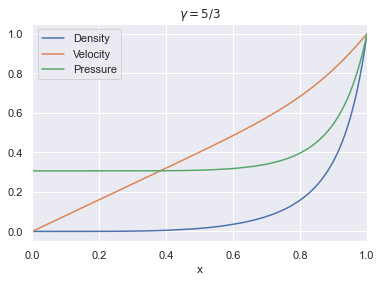

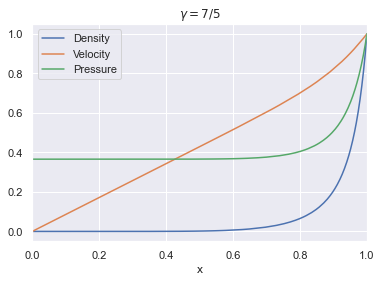

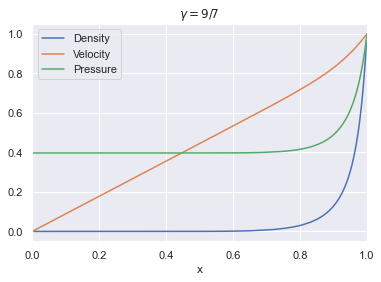

In [5]:
#Read data from file
x = []
RVP = []
T = []

files = ['gamma_0.dat', 'gamma_1.dat', 'gamma_2.dat']
for i in files:
    x.append(np.loadtxt(i, usecols = 0, unpack = True))
    RVP.append(np.loadtxt(i, usecols = [1, 2, 3], unpack = True))
    T.append(np.loadtxt(i, usecols = 4, unpack = True))

#GRAPHS
#Same gamma
for i in range(3):
    plt.figure()
    plt.xlabel("x")
    plt.xlim(0, 1)
    
    #Titles 
    title = title_1(i)
    plt.title(title)  
    
    #Plots
    for j in range(3):
        #Labels
        lab = lab_1(j);
        #Plots
        plt.plot(x[j], RVP[i][j], label = '{0}'.format(lab))
        
        plt.legend()

### Confronto tra grandezze omogenee per diversi valori di $\gamma$

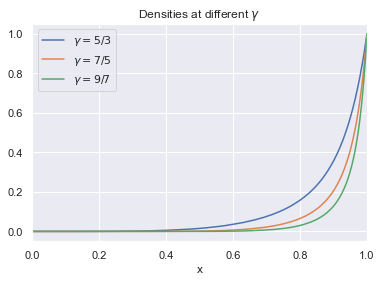

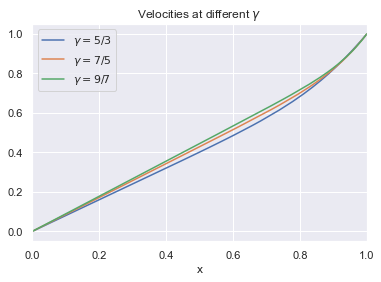

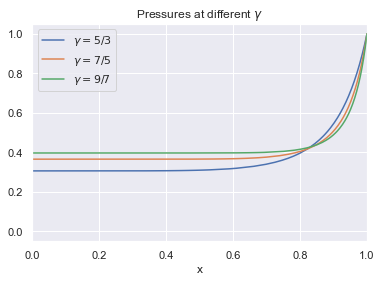

In [6]:
#Different Gamma
for i in range(3):
    plt.figure()
    plt.xlabel("x")
    plt.xlim(0, 1)
    plt.ylim(-0.05, 1.05)
    
    #Titles
    title = title_2(i)
    plt.title(title)

    #Plots
    for j in range(3):
        #Labels
        lab = title_1(j)
        #Plots
        plt.plot(x[j], RVP[j][i], label = '{0}'.format(lab))
        plt.legend()

Si passa ora allo studio dell'andamento della temperatura (implementato nel programma tramite la funzione `temperature`, che riceve in input ad ogni passo di integrazione i valori di $P(\xi)$ e $R(\xi)$). Dallo studio qualitativo dei grafici di pressione e densità, poichè la temperatura adimensionalizzata è definita come il rapporto fra esse, ci si aspetta di avere una divergenza per $\xi -> 0$: mentre la pressione si stabilizza infatti a un valore costante non nullo, la densità tende a 0 per $\xi$ piccoli. Quello che ci suggeriscono le equazioni di Sedov-Taylor-Von Neumann è dunque che partendo dal bordo della sfera di fuoco e procedendo verso il centro dell'esplosione la temperatura aumenti criticamente.

## Studio della Temperatura

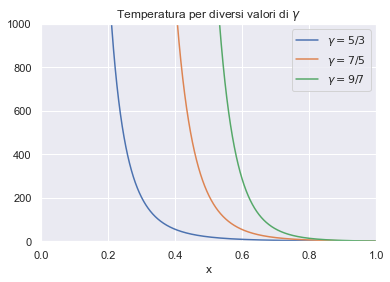

In [7]:
#Temperature 
plt.figure()
plt.xlabel("x")
plt.ylabel("")
plt.xlim(0, 1)
plt.ylim(0, 1000)

#Titles
title = "Temperatura per diversi valori di $\gamma$"
plt.title(title)

#Plots
for j in range(3):
    #Labels
    lab = title_1(j)
    #Plots
    plt.plot(x[j], T[j], label = '{0}'.format(lab))
    plt.legend()